Problem: Friedman-1 regression

__\<INCLUDE FORMULA\>__

Description: Page 207 DEAP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# used libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

sys.path.append(os.path.join('..', '..'))
import pywinEA2

In [3]:
# genetic algorithm parameters
POPULATION_SIZE = 100
MAX_GENERATIONS = 100
OPTIM_SCORE = 'mean_squared_error'
OPTIM = 'min'
PROB_MUTATION = 0.25
PROB_CROSSOVER = 0.75
SELECTION_OP = 'tournament'
MUTATION_OP = 'bit_flip'



# dataset creation parameters
N_SAMPLES = 200
N_FEATURES = 90
NOISE = 0.5

# misc
SEED = 1997


In [4]:
def getDataset() -> pd.DataFrame:
    """ Create the testing dataset """
    X, y = datasets.make_friedman1(
        n_samples=N_SAMPLES,
        n_features=N_FEATURES,
        noise=NOISE,
        random_state=SEED)
    
    X = pd.DataFrame(X, columns=['feat_{}'.format(f) for f in range(X.shape[1])])
    y = pd.DataFrame(y, columns=['target'])
    data = pd.concat([X, y], axis=1)
    
    return data

In [5]:
data = getDataset()
data.head(5)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,target
0,0.771148,0.074757,0.526310,0.975088,0.992226,0.465135,0.611135,0.569463,0.667719,0.786780,...,0.739056,0.189999,0.354658,0.213068,0.424554,0.320884,0.967451,0.063337,0.225850,16.864643
1,0.944677,0.166228,0.077853,0.717844,0.920020,0.615669,0.299287,0.847137,0.508283,0.131813,...,0.266088,0.491251,0.377104,0.265917,0.857921,0.914392,0.771561,0.187760,0.384997,20.389099
2,0.217790,0.972564,0.403189,0.872092,0.682622,0.445948,0.288469,0.761892,0.621428,0.208704,...,0.212825,0.341531,0.144842,0.435395,0.022645,0.667047,0.036734,0.655309,0.418235,18.261778
3,0.422399,0.438913,0.771213,0.502754,0.824081,0.200905,0.374775,0.723844,0.835281,0.951988,...,0.629061,0.112162,0.667163,0.303717,0.528023,0.122898,0.449646,0.511640,0.581908,15.298821
4,0.341653,0.076352,0.535166,0.679331,0.747861,0.665039,0.877723,0.025591,0.277263,0.648561,...,0.053892,0.553951,0.727013,0.407122,0.062515,0.518457,0.470395,0.892971,0.454677,11.989297


In [6]:
# create the model
model = SVR()

In [7]:
baseline_model = model.fit(data[data.columns.tolist()[:-1]], data['target'])
y_pred = baseline_model.predict(data[data.columns.tolist()[:-1]])
baseline_mse = np.mean((y_pred - data['target'].values)**2)
print('Baseline MSE: {:.3f}'.format(baseline_mse))

Baseline MSE: 17.351


In [8]:
# create the genetic algorithm instance
obj = pywinEA2.MultiObjFeatureSelectionNSGA2(
    data=data,
    model=model,
    score=OPTIM_SCORE,
    #objective_kw={'scale_features': lambda i: i / N_FEATURES},  # scale features to the range [0, 1]
    y=['target'],
    population_size=POPULATION_SIZE, 
    p_crossover=PROB_CROSSOVER,
    p_mutation=PROB_MUTATION,
    max_generations=MAX_GENERATIONS,
    target_feats=data.columns.tolist()[:-1],
    optim=OPTIM,
    selection_op=SELECTION_OP,
    mutation_op=MUTATION_OP)

In [9]:
report = pywinEA2.run(obj, type='nsga2', verbose=True)

gen	nevals	avg    	std    	min    	max	sum    	multiobj_fitness_values_mean	multiobj_fitness_values_min	multiobj_fitness_values_max
0  	      	31.6919	14.3085	13.2219	56 	6338.38	[17.89385 45.49   ]         	[13.22188752 34.        ]  	[20.90133122 56.        ]  
1  	      	29.7154	13.3425	12.8628	56 	5943.08	[16.92084201 42.51      ]   	[12.86278168 33.        ]  	[20.93726847 56.        ]  
2  	      	27.8188	11.5659	12.8628	49 	5563.77	[16.66766336 38.97      ]   	[12.86278168 31.        ]  	[20.93726847 49.        ]  
3  	      	26.3103	10.4041	12.6393	46 	5262.06	[16.34063113 36.28      ]   	[12.63934975 30.        ]  	[21.07368162 46.        ]  
4  	      	24.5402	9.78501	12.075 	41 	4908.05	[15.09045711 33.99      ]   	[12.07499101 27.        ]  	[20.56665124 41.        ]  
5  	      	23.1622	8.91061	11.7488	35 	4632.44	[14.57444526 31.75      ]   	[11.74878615 26.        ]  	[20.56665124 35.        ]  
6  	      	22.0769	8.46442	11.1444	35 	4415.39	[13.95387781 30.2       ]   	

60 	      	5.57742	2.07474	3      	18.4186	1115.48	[4.35484118 6.8       ]     	[3.87783654 3.        ]    	[18.41862894  7.        ]  
61 	      	5.57742	2.07474	3      	18.4186	1115.48	[4.35484118 6.8       ]     	[3.87783654 3.        ]    	[18.41862894  7.        ]  
62 	      	5.57742	2.07474	3      	18.4186	1115.48	[4.35484118 6.8       ]     	[3.87783654 3.        ]    	[18.41862894  7.        ]  
63 	      	5.57742	2.07474	3      	18.4186	1115.48	[4.35484118 6.8       ]     	[3.87783654 3.        ]    	[18.41862894  7.        ]  
64 	      	5.57742	2.07474	3      	18.4186	1115.48	[4.35484118 6.8       ]     	[3.87783654 3.        ]    	[18.41862894  7.        ]  
65 	      	5.57742	2.07474	3      	18.4186	1115.48	[4.35484118 6.8       ]     	[3.87783654 3.        ]    	[18.41862894  7.        ]  
66 	      	5.57742	2.07474	3      	18.4186	1115.48	[4.35484118 6.8       ]     	[3.87783654 3.        ]    	[18.41862894  7.        ]  
67 	      	5.57742	2.07474	3      	18.4186	1115.

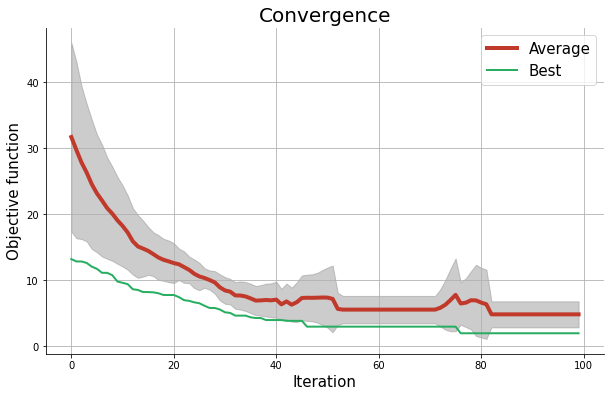

In [10]:
report.displayConvergence(title='Convergence')

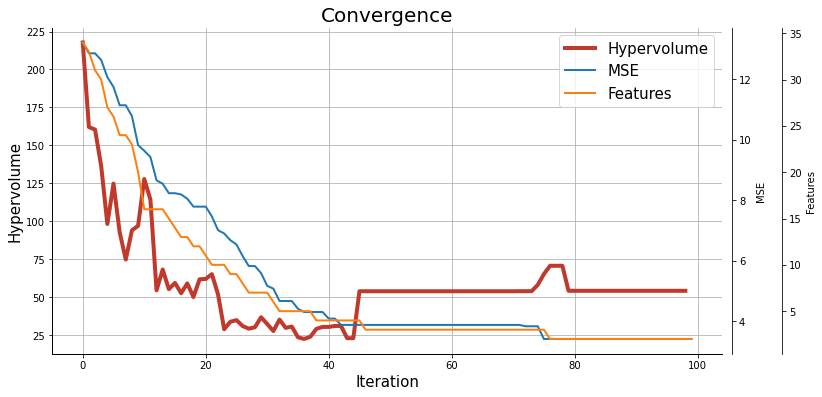

In [11]:
report.displayMultiObjectiveConvergence(title='Convergence', objective_names=['MSE', 'Features'])

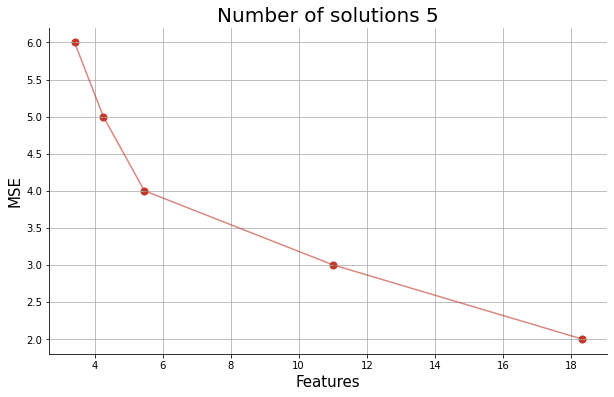

In [12]:
report.displayParetoFront(objective_names=['MSE', 'Features'])

In [13]:
data.columns.values[:-1][np.array(report.hall_of_fame[0], dtype=bool)]  # optimal solution

array(['feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_63'],
      dtype=object)

In [14]:
pywinEA2.save(report, 'test', extension='report')

<class 'pywinEA2.report.MultiObjectiveReport'> object serialised correctly in "C:\Users\gaguf\OneDrive - FUNDACIO ACE\Escritorio\GitHub\pywinEA2\examples\notebook\test.report


In [17]:
pywinEA2.load('test.report')